PACKAGE IMPORTATION

In [1]:
import numpy as np # for vector creation
import matplotlib.pyplot as plt # for graphic presentation
from sklearn.linear_model import LinearRegression # for linear regression

FUNCTION CREATION

For data importation

Use of given function to read fasta file
function creation for read fasta file : readFastaFile2
PARAMETERS : the filename (the file is in fasta format)
RETURNS : a list with all the protein sequences

In [2]:
def readFastaFile2(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    # first, I want to separate the proteins, the symbol that starts a new protein is '>'
    seqs = txt.split('>')[1:]
    listSeq = []
    
    for seq in seqs :
        lines = seq.split('\n')[1:]       
        s = ""  
        for line in lines :
            s = s + line
        listSeq.append(s)
    
    return(listSeq)

function creation for read word file : readWordFile2
created copying readFastaFile2 model

In [3]:
def readWordFile2(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    #  I want to separate the word, each word is separated by a line back
    seqs = txt.split('\n')[1:]
    
    return(seqs)

In [4]:
def CountWord (fasta,word): # function taking a fasta file and a word file for arguments
    res = np.zeros([len(fasta),2]) # initialisation of an object to store results
    for j in range(0,(len(fasta))) : # for each protein
        res[j,0]=len(fasta[j])  # we store its length in first column of the storing object
        for i in range(0,(len(word))) : # for each word
            l_word = len(word[i]) # creation of an object to an easy use of the word length
            for k in range (0,(len(fasta[j])-len(word[i])+1)) : # we run through the entire protein
                if (fasta[j][k:(k+l_word)] == word[i].upper()) : # for each protein part that have the lenght of our word, we check if it is identic to our word
                    res[j,1] += 1 # if it is the case we add one counting in the second column of the storing object, at the ligne corresponding to our protein
    return res # the function return the storing object

Function use

In [5]:
# importation of fasta file
fasta = readFastaFile2("C:/Users/julie/Documents/COURS/Cours M2 S1/ICE/Proteome/human-proteome.fasta")
# importation of word file
word = readWordFile2("C:/Users/julie/Documents/COURS/Cours M2 S1/ICE/Proteome/english-words.txt")
# count of words in each protein
res = CountWord(fasta,word)

GRAPHIC PRESENTATION

Simple graphic representation of the results on a scatter plot

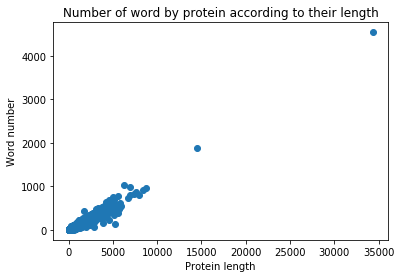

In [6]:
plt.scatter(res[:,0],res[:,1]) 
plt.title('Number of word by protein according to their length')
plt.xlabel('Protein length')
plt.ylabel('Word number')
plt.show()

Representation on a restricted area for a better visibility of most results
Only two observations are missing from this graph and visualisation is far better

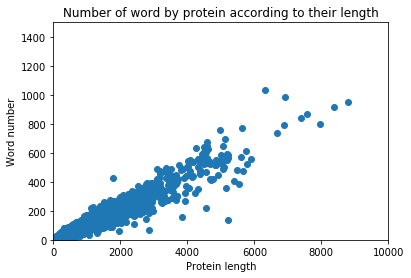

In [7]:
plt.scatter(res[:,0],res[:,1])
plt.title('Number of word by protein according to their length')
plt.xlabel('Protein length')
plt.ylabel('Word number')
plt.axis([0, 10000, 0, 1500])
plt.show()

We can clearly see a linear relation so we add a regression line on the graph

coefficient of determination: 0.9280868151746104
intercept: -3.750194421110052
slope: [0.11139944]


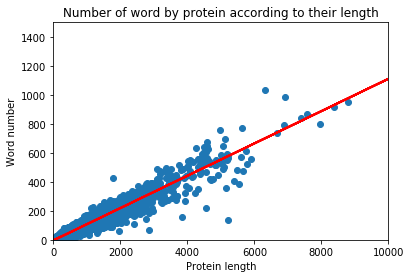

In [8]:
model = LinearRegression().fit(res[:,0].reshape((-1, 1)),res[:,1]) # linear regression model creation
r2 = model.score(res[:,0].reshape((-1, 1)),res[:,1])
print('coefficient of determination:', r2) # r² printing
print('intercept:', model.intercept_) # intercept printing
print('slope:', model.coef_) # coefficient printing

plt.scatter(res[:,0],res[:,1])
plt.title('Number of word by protein according to their length')
plt.xlabel('Protein length')
plt.ylabel('Word number')
plt.axis([0, 10000, 0, 1500])
plt.plot(res[:,0],model.coef_*res[:,0]+model.intercept_, color='red', linewidth=2)
plt.show()